<a href="https://colab.research.google.com/github/CatherineDemian/CatherineDemian-optimizer-comparison-cifar10-/blob/main/RMSProb_and_NAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RMSProm

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2210 - loss: 2.1475 - val_accuracy: 0.3316 - val_loss: 1.9274
Epoch 2/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3341 - loss: 1.9091 - val_accuracy: 0.3571 - val_loss: 1.8505
Epoch 3/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3582 - loss: 1.8425 - val_accuracy: 0.3740 - val_loss: 1.8070
Epoch 4/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3753 - loss: 1.8020 - val_accuracy: 0.3837 - val_loss: 1.7771
Epoch 5/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3872 - loss: 1.7731 - val_accuracy: 0.3897 - val_loss: 1.7534
Epoch 6/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3957 - loss: 1.7496 - val_accuracy: 0.3983 - val_loss: 1.7333
Epoch 7/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4050 - loss: 1.7294 - val_accuracy: 0.4021 - val_loss: 1.7163
Epoch 8/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4117 - loss: 1

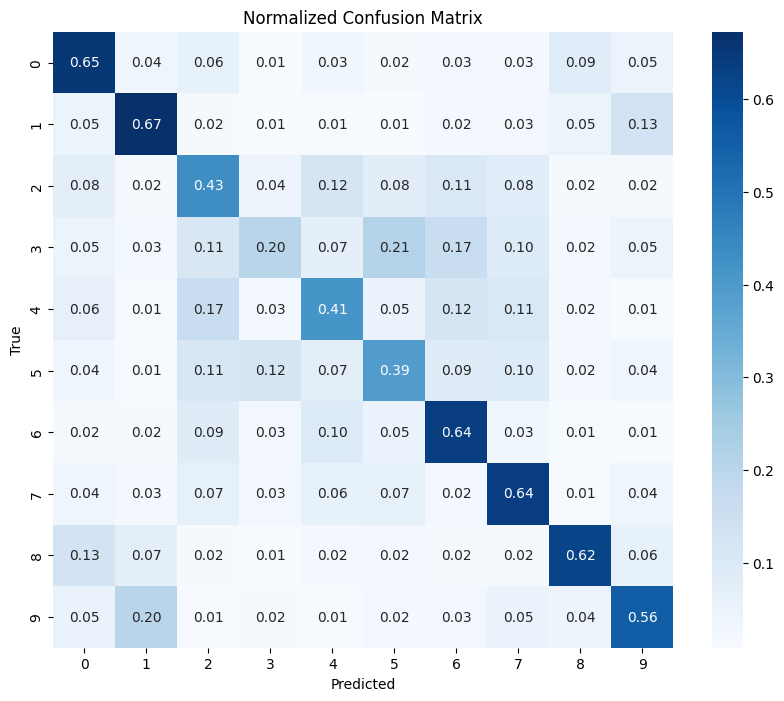

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.56      0.65      0.60      1000
     Class 1       0.61      0.67      0.64      1000
     Class 2       0.40      0.43      0.42      1000
     Class 3       0.41      0.20      0.27      1000
     Class 4       0.45      0.41      0.43      1000
     Class 5       0.42      0.39      0.41      1000
     Class 6       0.51      0.64      0.57      1000
     Class 7       0.54      0.64      0.58      1000
     Class 8       0.68      0.62      0.65      1000
     Class 9       0.57      0.56      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000



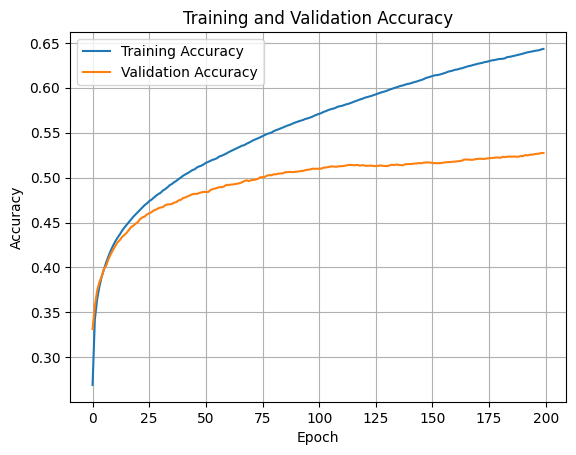

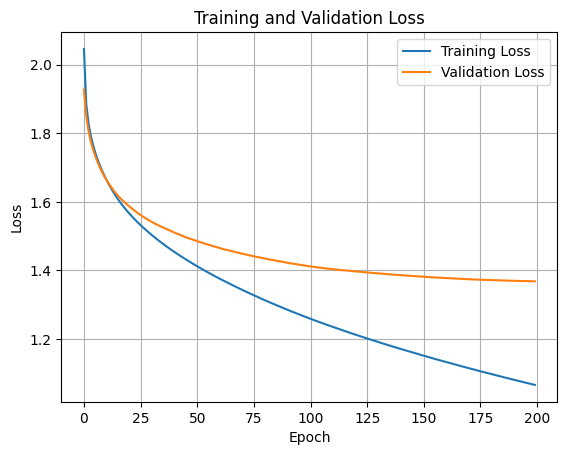

Training time: 718.42 seconds


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Split the training data into 80% training and 20% validation
val_split = 0.2
val_size = int(len(x_train_full) * val_split)

x_val = x_train_full[:val_size]
y_val = y_train_full[:val_size]
x_train = x_train_full[val_size:]
y_train = y_train_full[val_size:]

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
x_val_flat = x_val.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define RMSProp optimizer
optimizer_rmsprop = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.1, epsilon=1e-7)

# Compile the model with RMSProp optimizer
model = create_model()
model.compile(optimizer=optimizer_rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,  # Stop training after 5 epochs of no improvement
    min_delta=0.001,  # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

# Measure the training time
start_time = time.time()
history = model.fit(
    x_train_flat, y_train,
    epochs=200,
    validation_data=(x_val_flat, y_val),
    batch_size=32,
    callbacks=[early_stop]  # Add EarlyStopping
)
training_time = time.time() - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 4: Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Print the training time
print(f"Training time: {training_time:.2f} seconds")


Step RMS

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2235 - loss: 2.1491 - val_accuracy: 0.3272 - val_loss: 1.9419 - learning_rate: 1.0000e-05
Epoch 2/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3321 - loss: 1.9182 - val_accuracy: 0.3545 - val_loss: 1.8602 - learning_rate: 1.0000e-05
Epoch 3/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3582 - loss: 1.8503 - val_accuracy: 0.3711 - val_loss: 1.8158 - learning_rate: 1.0000e-05
Epoch 4/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3746 - loss: 1.8098 - val_accuracy: 0.3834 - val_loss: 1.7838 - learning_rate: 1.0000e-05
Epoch 5/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.3869 - loss: 1.7795 - val_accuracy: 0.3926 - val_loss: 1.7585 - learning_rate: 1.0000e-05
Epoch 6/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3945 - loss: 1.7545 - val_accuracy: 0.3985 - val_loss: 1.7377 - learning_rate: 1.0000e-05
Epoch 7/70
1250/1250 ━━━━━━━━━━━━━━━━━━━

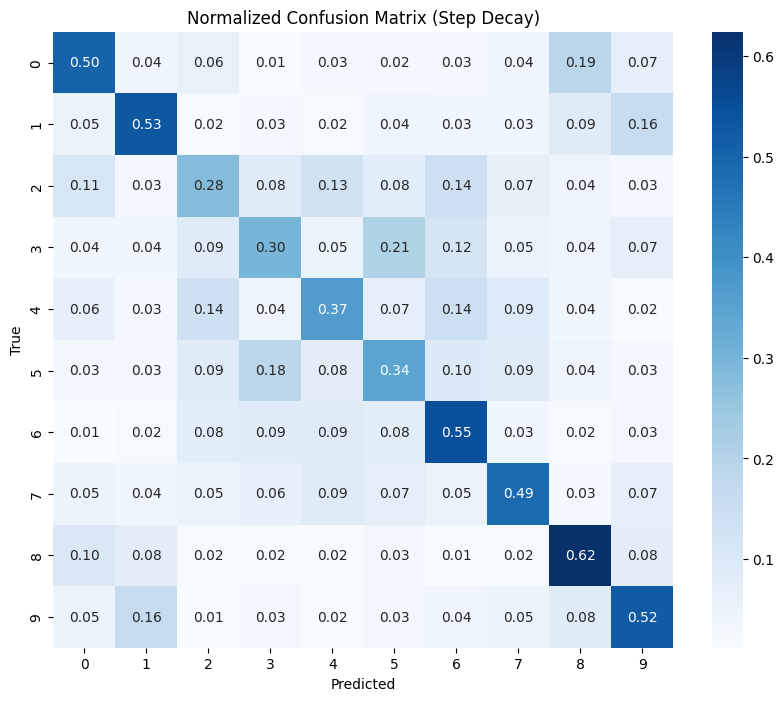

Classification Report (Step Decay):
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1000
           1       0.53      0.53      0.53      1000
           2       0.34      0.28      0.30      1000
           3       0.35      0.30      0.32      1000
           4       0.42      0.37      0.39      1000
           5       0.35      0.34      0.35      1000
           6       0.45      0.55      0.50      1000
           7       0.51      0.49      0.50      1000
           8       0.52      0.62      0.57      1000
           9       0.49      0.52      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.44      0.45      0.45     10000
weighted avg       0.44      0.45      0.45     10000



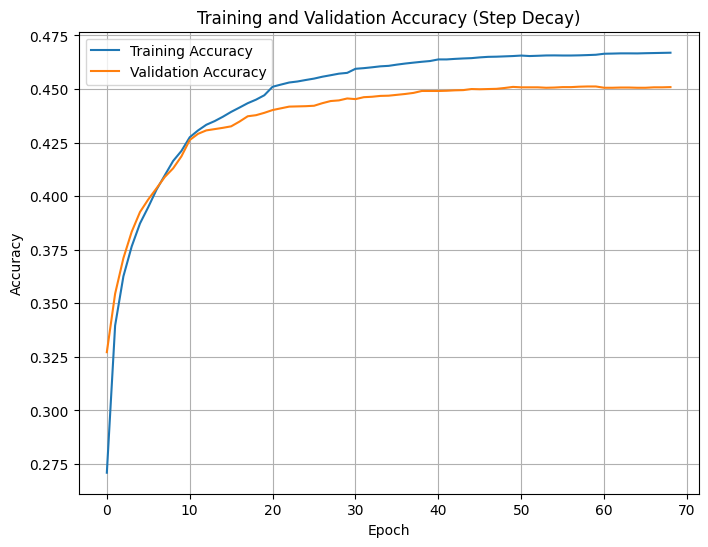

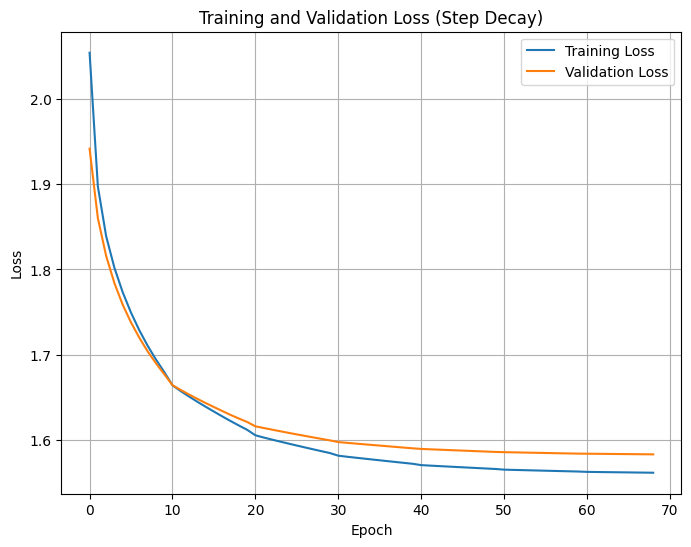

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Split the training data into 80% training and 20% validation
val_split = 0.2
val_size = int(len(x_train_full) * val_split)

x_val = x_train_full[:val_size]
y_val = y_train_full[:val_size]
x_train = x_train_full[val_size:]
y_train = y_train_full[val_size:]

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
x_val_flat = x_val.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Step Decay Learning Rate function
def step_decay(epoch):
    initial_lr = 0.00001  # Initial learning rate
    drop = 0.5  # Factor by which the learning rate will drop
    epoch_drop = 10  # Number of epochs after which learning rate will drop
    lr = initial_lr * (drop ** (epoch // epoch_drop))
    return lr

# Early stopping configuration with min_delta set to 0.001
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    min_delta=0.001,  # Minimum change to qualify as an improvement
    restore_best_weights=True
)

# LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(step_decay)

# Compile and train the model
model_step = create_model()
model_step.compile(optimizer=RMSprop(learning_rate=0.00001),  # Use initial lr
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Measure training time
start_time = time.time()
history_step = model_step.fit(
    x_train_flat, y_train,
    epochs=70,  # Set epochs to 70
    validation_data=(x_val_flat, y_val),
    batch_size=32,
    callbacks=[early_stop, lr_scheduler]  # Use the lr_scheduler here
)
training_time = time.time() - start_time

# Print training time
print(f"Training time: {training_time:.2f} seconds")

# Evaluate the model
test_loss, test_accuracy = model_step.evaluate(x_test_flat, y_test, verbose=0)
print(f"Step Decay - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model_step.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix (Step Decay)')
plt.show()

# Print classification report
print("Classification Report (Step Decay):")
print(classification_report(y_true, y_pred_classes))

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_step.history['accuracy'], label='Training Accuracy')
plt.plot(history_step.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Step Decay)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history_step.history['loss'], label='Training Loss')
plt.plot(history_step.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Step Decay)')
plt.legend()
plt.grid(True)
plt.show()


Exp RMS

Epoch 1/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2214 - loss: 2.1638 - val_accuracy: 0.3277 - val_loss: 1.9438
Epoch 2/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3351 - loss: 1.9290 - val_accuracy: 0.3492 - val_loss: 1.8754
Epoch 3/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3581 - loss: 1.8731 - val_accuracy: 0.3618 - val_loss: 1.8421
Epoch 4/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3673 - loss: 1.8441 - val_accuracy: 0.3707 - val_loss: 1.8228
Epoch 5/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3746 - loss: 1.8263 - val_accuracy: 0.3745 - val_loss: 1.8102
Epoch 6/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3787 - loss: 1.8144 - val_accuracy: 0.3762 - val_loss: 1.8017
Epoch 7/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3822 - loss: 1.8063 - val_accuracy: 0.3795 - val_loss: 1.7958
Epoch 8/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3841 - loss: 1

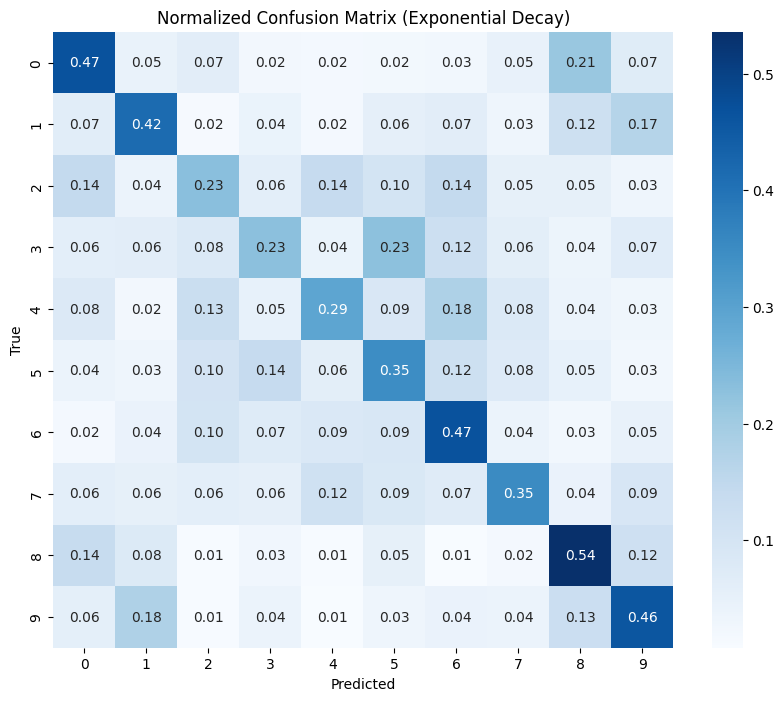

Classification Report (Exponential Decay):
              precision    recall  f1-score   support

           0       0.41      0.47      0.44      1000
           1       0.43      0.42      0.42      1000
           2       0.28      0.23      0.26      1000
           3       0.31      0.23      0.26      1000
           4       0.37      0.29      0.33      1000
           5       0.31      0.35      0.33      1000
           6       0.37      0.47      0.41      1000
           7       0.43      0.35      0.39      1000
           8       0.43      0.54      0.48      1000
           9       0.41      0.46      0.43      1000

    accuracy                           0.38     10000
   macro avg       0.38      0.38      0.37     10000
weighted avg       0.38      0.38      0.37     10000



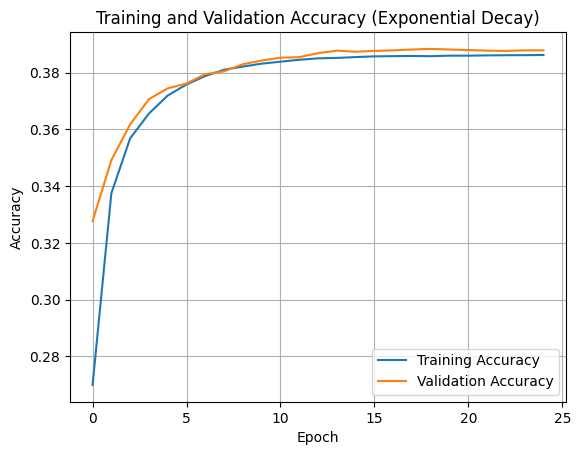

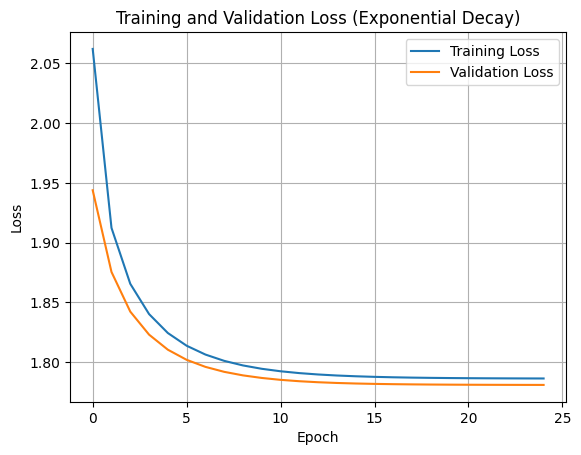

In [ ]:
# Exponential Decay Learning Rate
lr_schedule_exp = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.00001,
    decay_steps=10000,
    decay_rate=0.1,
    staircase=False
)

# Early Stopping with min_delta
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    min_delta=0.001,  # Minimum improvement threshold
    restore_best_weights=True
)

# Compile and train the model
model_exp = create_model()
model_exp.compile(optimizer=RMSprop(learning_rate=lr_schedule_exp),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Measure training time
start_time = time.time()
history_exp = model_exp.fit(
    x_train_flat, y_train,
    epochs=200,
    validation_data=(x_val_flat, y_val),
    batch_size=32,
    callbacks=[early_stop]
)
training_time = time.time() - start_time

# Print the total training time
print(f"Training time: {training_time:.2f} seconds")

# Evaluate the model
test_loss, test_accuracy = model_exp.evaluate(x_test_flat, y_test, verbose=0)
print(f"Exponential Decay - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model_exp.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix (Exponential Decay)')
plt.show()

# Print classification report
print("Classification Report (Exponential Decay):")
print(classification_report(y_true, y_pred_classes))

# Plot training and validation accuracy
plt.plot(history_exp.history['accuracy'], label='Training Accuracy')
plt.plot(history_exp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Exponential Decay)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.plot(history_exp.history['loss'], label='Training Loss')
plt.plot(history_exp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Exponential Decay)')
plt.legend()
plt.grid(True)
plt.show()


NAG

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.2750 - loss: 2.0144 - val_accuracy: 0.3554 - val_loss: 1.8239
Epoch 2/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.3774 - loss: 1.7750 - val_accuracy: 0.3905 - val_loss: 1.7301
Epoch 3/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4095 - loss: 1.6959 - val_accuracy: 0.4127 - val_loss: 1.6756
Epoch 4/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4277 - loss: 1.6421 - val_accuracy: 0.4263 - val_loss: 1.6350
Epoch 5/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4428 - loss: 1.6003 - val_accuracy: 0.4406 - val_loss: 1.6024
Epoch 6/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4558 - loss: 1.5657 - val_accuracy: 0.4456 - val_loss: 1.5791
Epoch 7/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.4647 - loss: 1.5363 - val_accuracy: 0.4542 - val_loss: 1.5583
Epoch 8/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4742 -

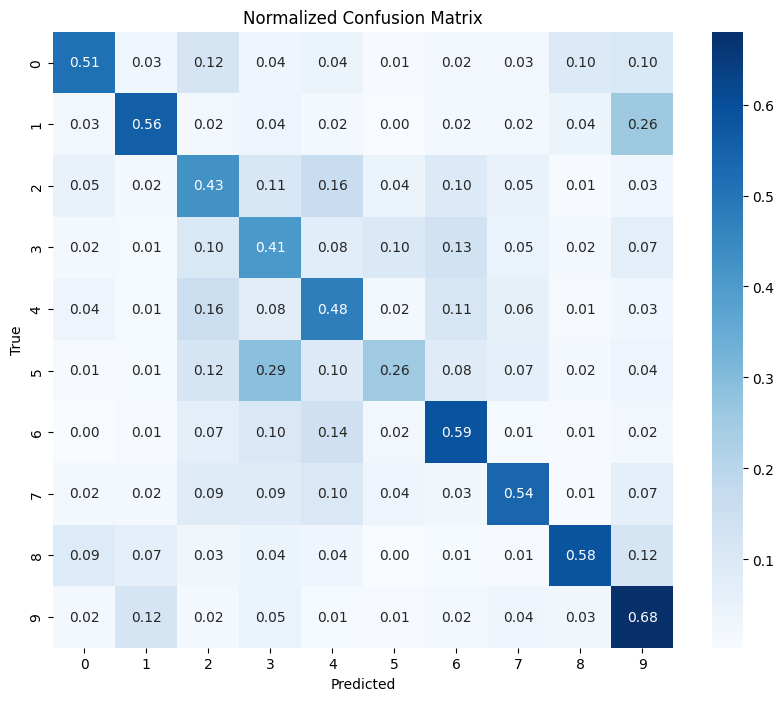

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.51      0.57      1000
     Class 1       0.64      0.56      0.60      1000
     Class 2       0.37      0.43      0.39      1000
     Class 3       0.33      0.41      0.36      1000
     Class 4       0.41      0.48      0.44      1000
     Class 5       0.50      0.26      0.34      1000
     Class 6       0.53      0.59      0.56      1000
     Class 7       0.61      0.54      0.57      1000
     Class 8       0.70      0.58      0.64      1000
     Class 9       0.48      0.68      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.50     10000
weighted avg       0.52      0.50      0.50     10000



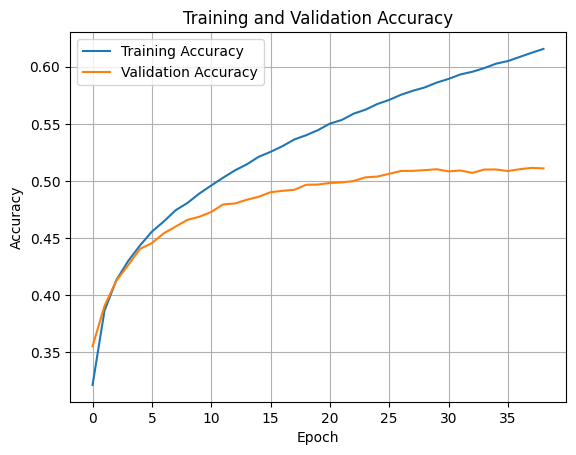

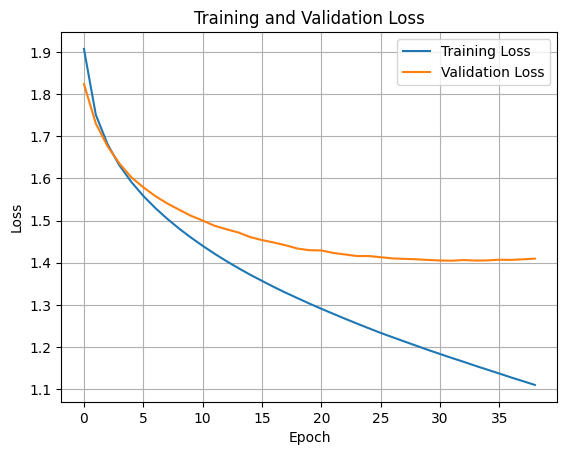

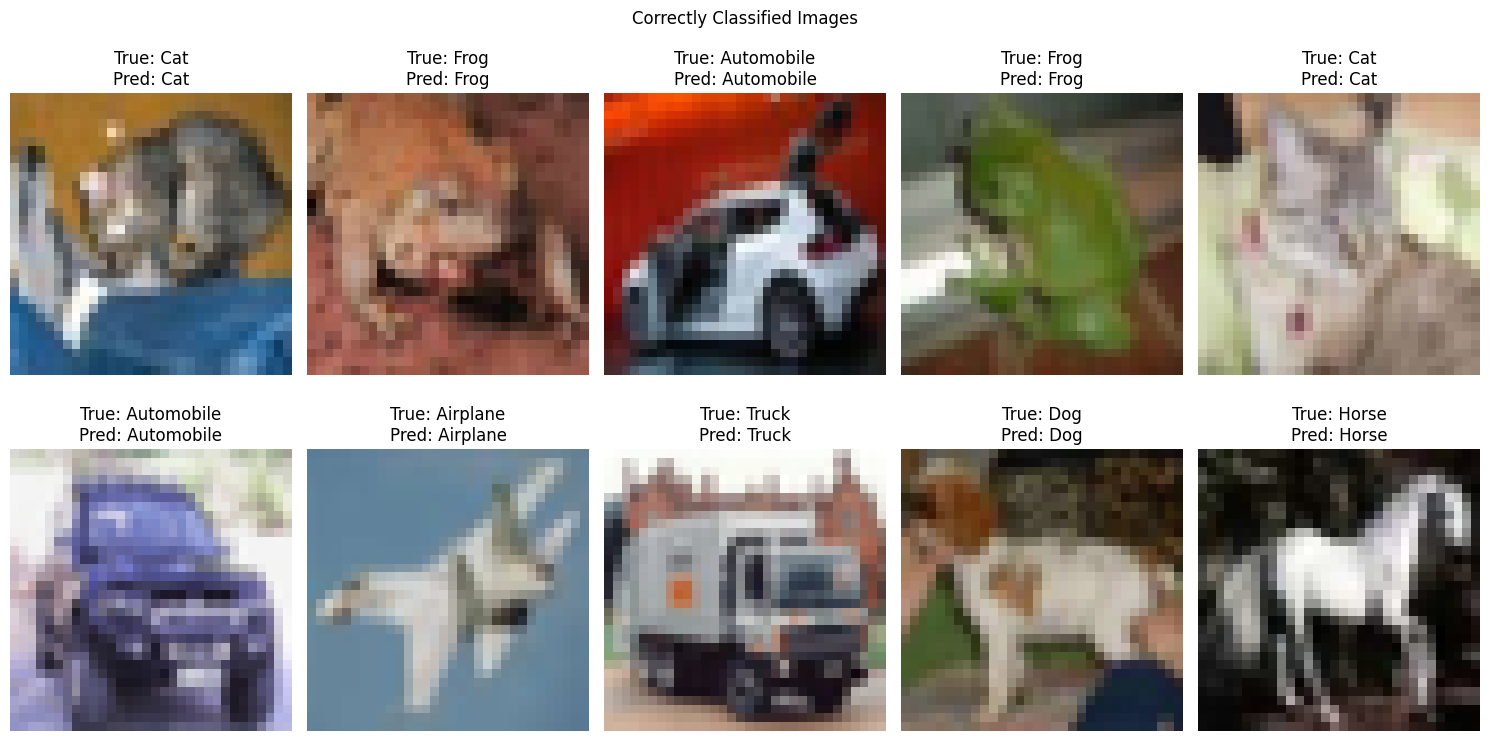

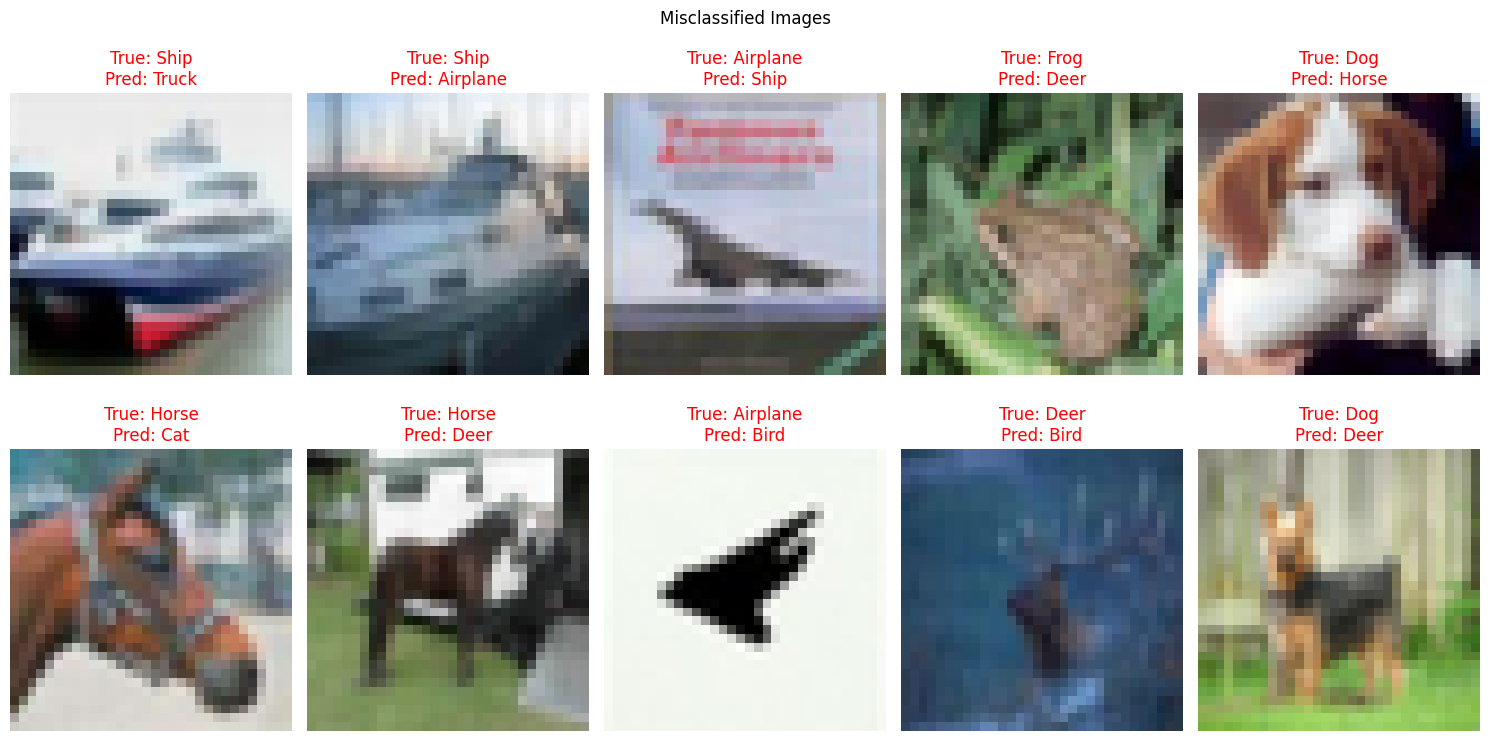

Training time: 742.25 seconds


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
seed = 32
np.random.seed(seed)
tf.random.set_seed(seed)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Split the training data into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=seed)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define NAG optimizer (SGD with Nesterov momentum)
optimizer_nag = SGD(learning_rate=0.001, momentum=0.7, nesterov=True)

# Compile the model with NAG optimizer
model = create_model()
model.compile(optimizer=optimizer_nag,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,  # Stop training after 5 epochs of no improvement
    min_delta=0.001,  # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

# Measure the training time
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=500,
    validation_data=(x_val, y_val),
    batch_size=16,
    callbacks=[early_stop]  # Add EarlyStopping
)
training_time = time.time() - start_time

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 4: Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()
# Map numeric labels to CIFAR-10 class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Get correctly and incorrectly classified indices
correct_indices = np.where(y_true == y_pred_classes)[0]
incorrect_indices = np.where(y_true != y_pred_classes)[0]

# Plot correctly classified images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(correct_indices[:10]):  # Display 10 correct samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.suptitle("Correctly Classified Images")
plt.tight_layout()
plt.show()

# Plot misclassified images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(incorrect_indices[:10]):  # Display 10 incorrect samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}", color='red')
    plt.axis('off')
plt.suptitle("Misclassified Images")
plt.tight_layout()
plt.show()

# Print the training time
print(f"Training time: {training_time:.2f} seconds")


NAG with Step Decay

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.2764 - loss: 2.0088 - val_accuracy: 0.3697 - val_loss: 1.7975 - learning_rate: 0.0010
Epoch 2/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.3748 - loss: 1.7718 - val_accuracy: 0.3993 - val_loss: 1.7123 - learning_rate: 0.0010
Epoch 3/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4062 - loss: 1.6932 - val_accuracy: 0.4178 - val_loss: 1.6633 - learning_rate: 0.0010
Epoch 4/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.4254 - loss: 1.6393 - val_accuracy: 0.4294 - val_loss: 1.6254 - learning_rate: 0.0010
Epoch 5/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4403 - loss: 1.5977 - val_accuracy: 0.4411 - val_loss: 1.5940 - learning_rate: 0.0010
Epoch 6/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.4528 - loss: 1.5636 - val_accuracy: 0.4477 - val_loss: 1.5743 - learning_rate: 0.0010
Epoch 7/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accura

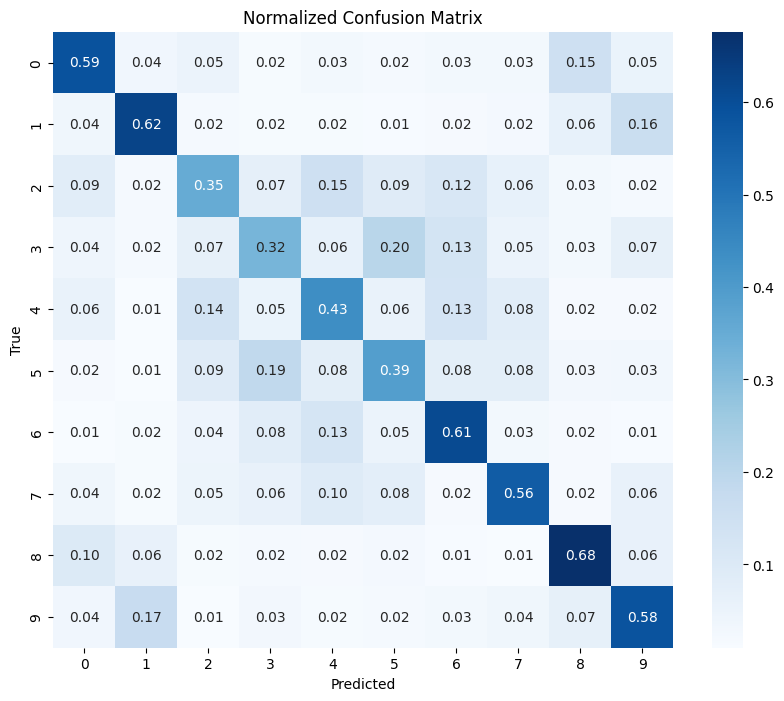

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.58      0.59      0.58      1000
     Class 1       0.63      0.62      0.63      1000
     Class 2       0.42      0.35      0.38      1000
     Class 3       0.38      0.32      0.35      1000
     Class 4       0.42      0.43      0.43      1000
     Class 5       0.41      0.39      0.40      1000
     Class 6       0.52      0.61      0.56      1000
     Class 7       0.58      0.56      0.57      1000
     Class 8       0.61      0.68      0.64      1000
     Class 9       0.54      0.58      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



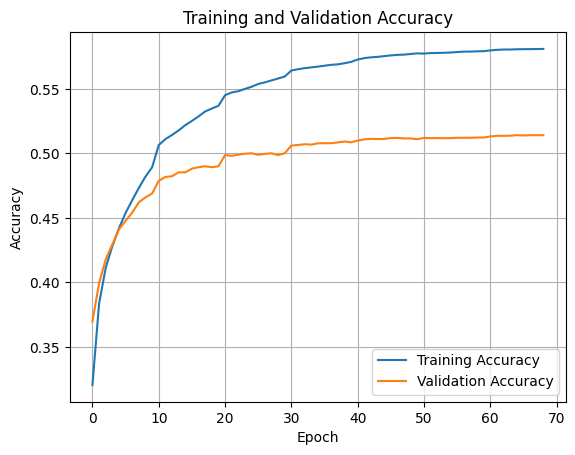

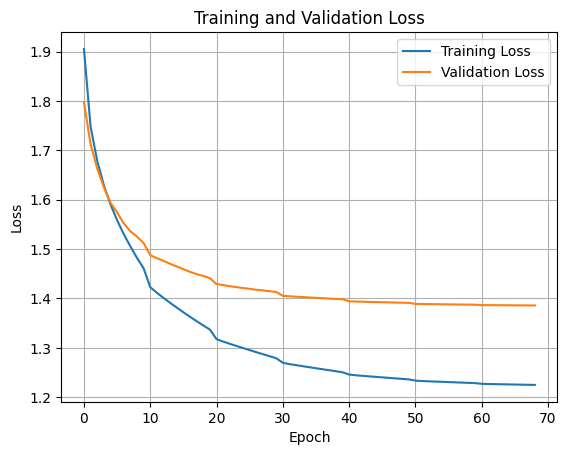

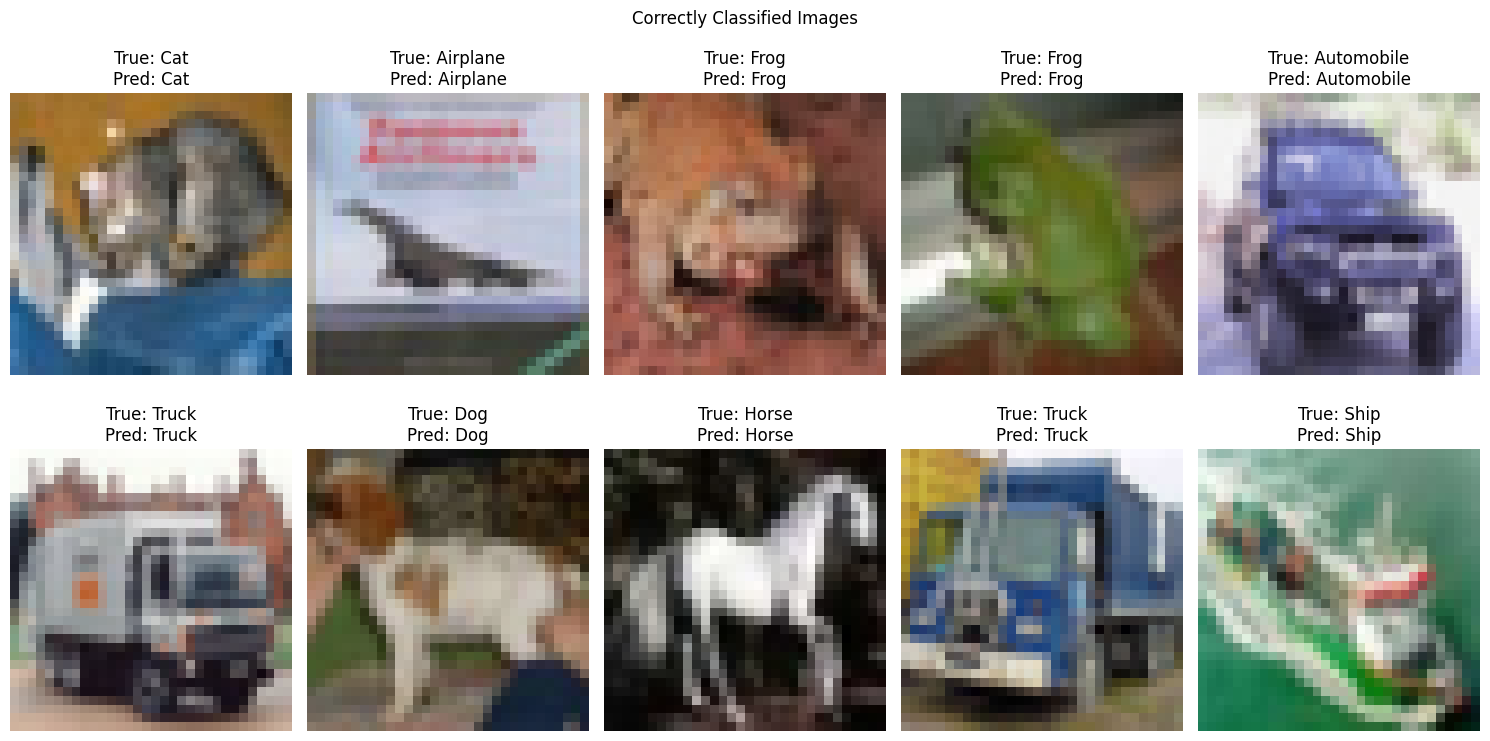

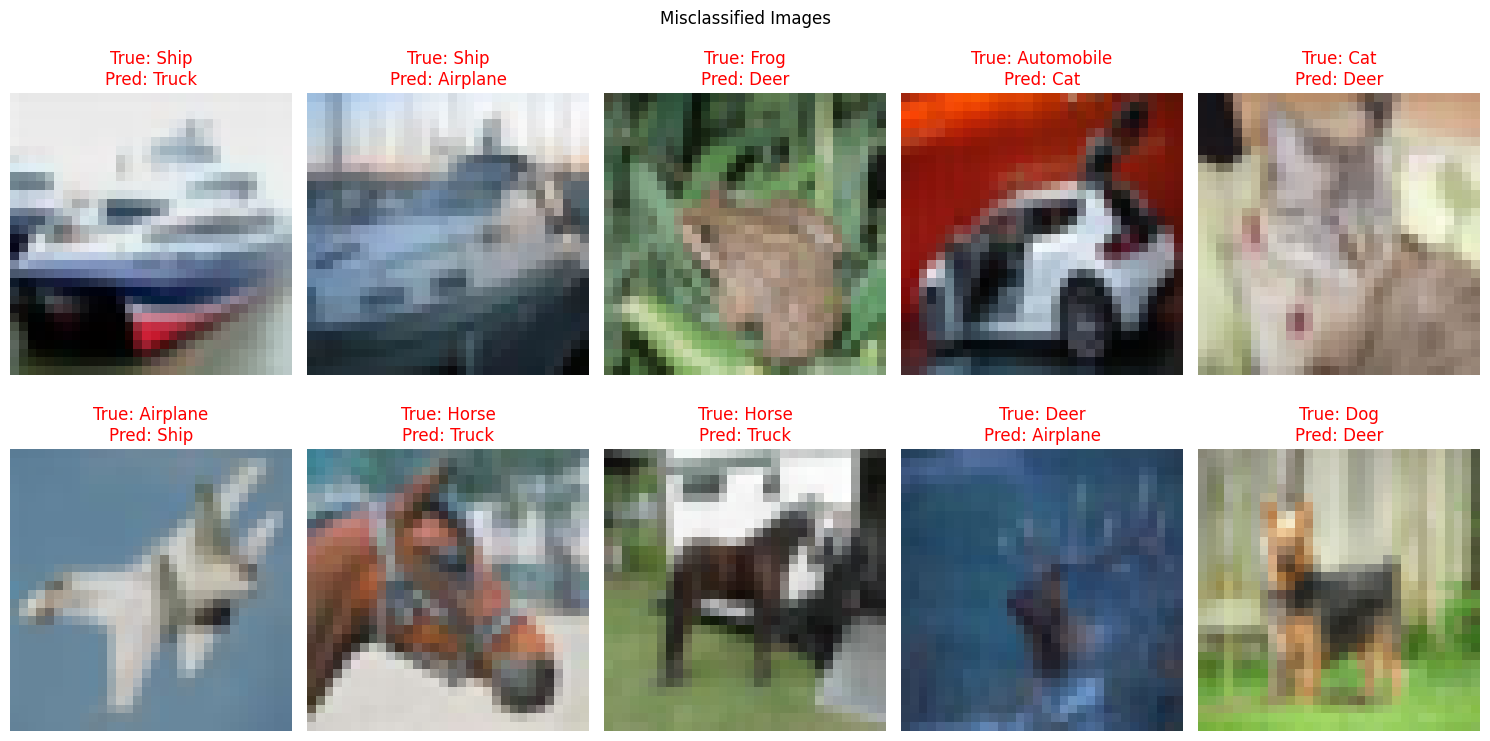

Training time: 1412.03 seconds


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
seed = 32
np.random.seed(seed)
tf.random.set_seed(seed)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Split the training data into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=seed)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define NAG optimizer (SGD with Nesterov momentum)
optimizer_nag = SGD(learning_rate=0.001, momentum=0.7, nesterov=True)

# Step Decay Function
def step_decay(epoch):
    initial_lr = 0.001  # Initial learning rate
    drop = 0.5  # Factor by which to drop the learning rate
    epochs_drop = 10  # Number of epochs before the learning rate is dropped
    new_lr = initial_lr * (drop ** (epoch // epochs_drop))
    return new_lr

# Define the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(step_decay)

# Compile the model with NAG optimizer
model = create_model()
model.compile(optimizer=optimizer_nag,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,  # Stop training after 8 epochs of no improvement
    min_delta=0.001,  # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

# Measure the training time
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=500,
    validation_data=(x_val, y_val),
    batch_size=16,
    callbacks=[early_stop, lr_scheduler]  # Add EarlyStopping and LearningRateScheduler
)
training_time = time.time() - start_time

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Map numeric labels to CIFAR-10 class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Get correctly and incorrectly classified indices
correct_indices = np.where(y_true == y_pred_classes)[0]
incorrect_indices = np.where(y_true != y_pred_classes)[0]

# Plot correctly classified images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(correct_indices[:10]):  # Display 10 correct samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.suptitle("Correctly Classified Images")
plt.tight_layout()
plt.show()

# Plot misclassified images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(incorrect_indices[:10]):  # Display 10 incorrect samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}", color='red')
    plt.axis('off')
plt.suptitle("Misclassified Images")
plt.tight_layout()
plt.show()

# Print the training time
print(f"Training time: {training_time:.2f} seconds")


**Exponential Decay Learning Rate**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.2720 - loss: 2.0200 - val_accuracy: 0.3529 - val_loss: 1.8303
Epoch 2/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3741 - loss: 1.7777 - val_accuracy: 0.3853 - val_loss: 1.7397
Epoch 3/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.4059 - loss: 1.6980 - val_accuracy: 0.4078 - val_loss: 1.6806
Epoch 4/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4267 - loss: 1.6423 - val_accuracy: 0.4251 - val_loss: 1.6419
Epoch 5/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.4421 - loss: 1.5991 - val_accuracy: 0.4345 - val_loss: 1.6126
Epoch 6/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.4553 - loss: 1.5632 - val_accuracy: 0.4441 - val_loss: 1.5881
Epoch 7/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4661 - loss: 1.5327 - val_accuracy: 0.4531 - val_loss: 1.5652
Epoch 8/500
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4743 -

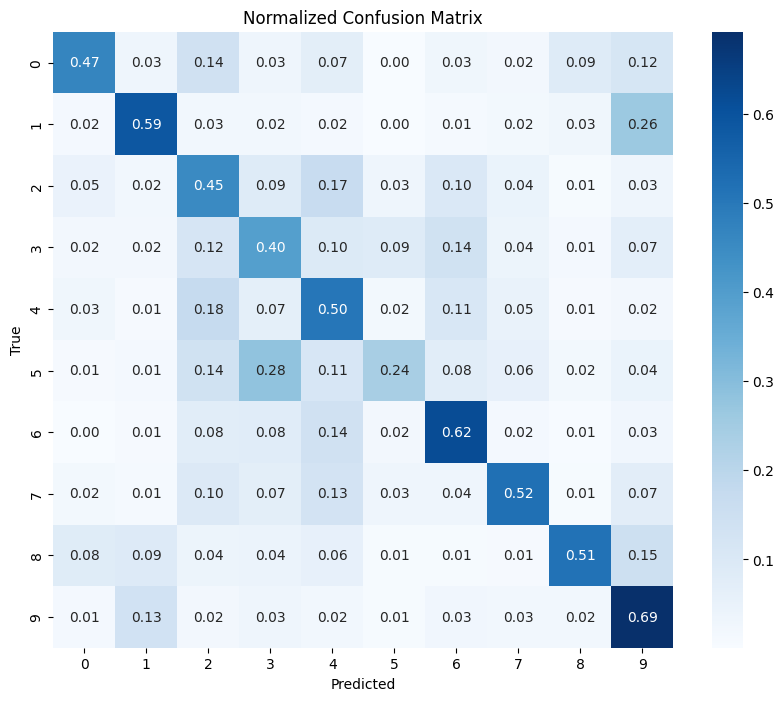

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.66      0.47      0.55      1000
     Class 1       0.62      0.59      0.61      1000
     Class 2       0.35      0.45      0.40      1000
     Class 3       0.35      0.40      0.37      1000
     Class 4       0.38      0.50      0.43      1000
     Class 5       0.53      0.24      0.33      1000
     Class 6       0.53      0.62      0.57      1000
     Class 7       0.64      0.52      0.58      1000
     Class 8       0.71      0.51      0.60      1000
     Class 9       0.46      0.69      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.50     10000
weighted avg       0.53      0.50      0.50     10000



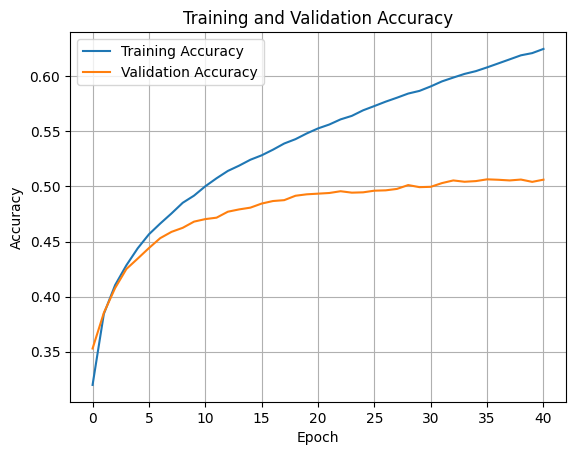

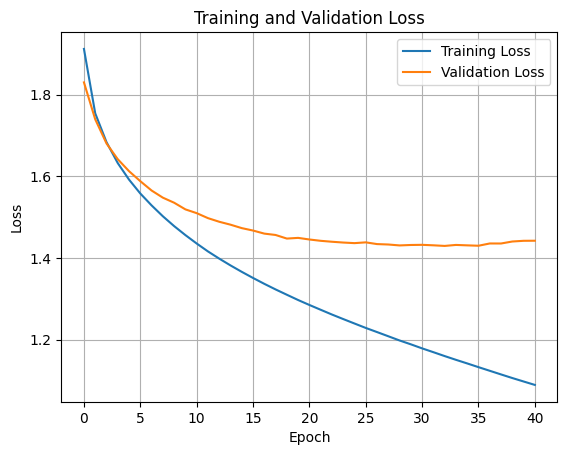

Training time: 873.47 seconds


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
seed = 32
np.random.seed(seed)
tf.random.set_seed(seed)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Split the training data into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=seed)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define Exponential Decay Learning Rate Schedule
def exp_decay(epoch):
    initial_lr = 0.001  # Initial learning rate
    decay_rate = 0.1  # Decay rate
    decay_steps = 100000  # Number of steps before applying decay
    lr = initial_lr * decay_rate ** (epoch / decay_steps)
    return lr

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,  # Stop training after 8 epochs of no improvement
    min_delta=0.001,  # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

# Compile the model with Exponential Decay Learning Rate
model_exp = create_model()
model_exp.compile(optimizer=SGD(learning_rate=exp_decay(0), momentum=0.7, nesterov=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Measure the training time
start_time = time.time()
history_exp = model_exp.fit(
    x_train, y_train,
    epochs=500,
    validation_data=(x_val, y_val),
    batch_size=16,
    callbacks=[early_stop]  # Add EarlyStopping
)
training_time = time.time() - start_time

# Evaluate the model on the test set
test_loss, test_accuracy = model_exp.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model_exp.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history_exp.history['accuracy'], label='Training Accuracy')
plt.plot(history_exp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history_exp.history['loss'], label='Training Loss')
plt.plot(history_exp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Print the training time
print(f"Training time: {training_time:.2f} seconds")
